<a href="https://colab.research.google.com/github/sedavasema/mohammad/blob/main/Bing_edge_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.cluster import KMeans
import numpy as np

In [3]:
# Generate data
x = np.random.normal(size=(1000, 2))
y = KMeans(n_clusters=3).fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
x.shape

(1000, 2)

In [5]:
# Define model
input_layer = Input(shape=(2,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(2)(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [6]:
# Train model
autoencoder.fit(x, x, epochs=50)

Epoch 1/50
32/32 [==============================] - 1s 3ms/step - loss: 0.6588
Epoch 2/50
32/32 [==============================] - 0s 3ms/step - loss: 0.0239
Epoch 3/50
32/32 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 4/50
32/32 [==============================] - 0s 3ms/step - loss: 9.0103e-04
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 3.2419e-04
Epoch 6/50
32/32 [==============================] - 0s 3ms/step - loss: 1.8899e-04
Epoch 7/50
32/32 [==============================] - 0s 3ms/step - loss: 1.4334e-04
Epoch 8/50
32/32 [==============================] - 0s 3ms/step - loss: 1.3962e-04
Epoch 9/50
32/32 [==============================] - 0s 3ms/step - loss: 9.3647e-05
Epoch 10/50
32/32 [==============================] - 0s 3ms/step - loss: 7.6132e-05
Epoch 11/50
32/32 [==============================] - 0s 3ms/step - loss: 1.6467e-04
Epoch 12/50
32/32 [==============================] - 0s 3ms/step - loss: 1.1232e-04
Epoch 13/50
3

In [7]:
# Get cluster assignments
cluster_model = Model(inputs=autoencoder.input,
                      outputs=autoencoder.get_layer('dense_2').output)
clusters = cluster_model.predict(x)

32/32 [==============================] - 0s 2ms/step


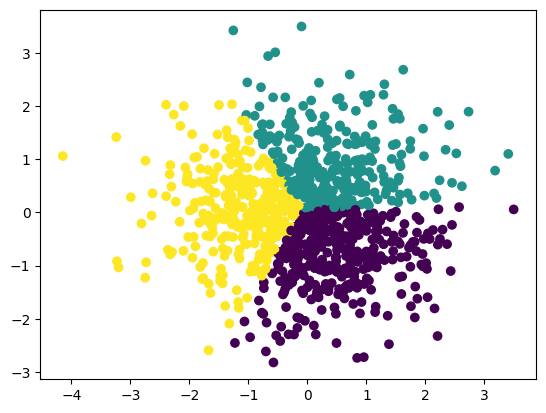

In [8]:
# Plot results
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()